# Comparação de modelos de esforços de vento

In [4]:
from normaslt import types, nbr5422, nbr1985, nbr_working, iec
from math import pi, exp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, Dropdown, FloatSlider, FloatLogSlider

In [2]:
# Dados de entrada
Vp10 = 10 # Vento de projeto, 10 min
hc = 10 # altura do cabo

def plot_balanco1(terreno, cabo, h, Vpvm): 
    match cabo:
        case 'CAA Linnet':
            d = 18.31e-3 
            pcond = 0.68993 
            T = 62.92e3
        case 'CAA Grosbeak':
            d = 25.15e-3 
            pcond = 1.30172
            T = 111.87e3
        case 'CAA Rail':
            d = 29.61e-3 
            pcond = 1.602 
            T = 115.63e3
        case 'CA Coreopsis':
            d = 36.90e-3 
            pcond = 2.22041
            T = 119.6e3
        case 'CAL Chlorine':
            d = 7.5e-3
            pcond = 0.0943
            T = 8.16e3
        case 'CAL Oxygen':
            d = 23.8e-3
            pcond = 0.924
            T = 73.57e3
        case _:
            d = 0
            pcond = 0
            T = 0
    
    rug = terreno 
    Lm = 450 
    Lp = Vpvm * Lm

    vp = np.linspace(0, 50, 200) 
    v0 = vp * nbr5422.fatCorrAlt(rug, h) * nbr5422.fatCorrRug(rug) 
    mu = 1.225 
    q0 = 0.5 * mu * v0**2 
    ang1 = 180/pi * np.array([nbr5422.anguloBalanco(v, q, d, pcond * 9.8, Lm, Lp) for v,q in zip(v0,q0)])

    plt.figure(figsize=(8, 6))
    plt.plot(vp, ang1)

    ang2 = 180/pi * np.array([nbr_working.anguloHornisgrinde(v, d, pcond * 9.8, Lm, Lp) for v in v0])
    plt.plot(vp, ang2)

    ang3 = 180/pi * np.array([nbr_working.anguloBalanco(v, d, 1, pcond * 9.8, 0, 0, Lm, Lp, 0.2 * T) for v in v0])
    plt.plot(vp, ang3)
    plt.title('Ângulo de balanço')
    plt.xlabel('Velocidade de vento de referência (m/s)')
    plt.ylabel('Ângulo (graus)')
    plt.grid(True)
    plt.show()
    
cable_options = {'CAA Linnet', 'CAA Grosbeak', 'CAA Rail', 'CA Coreopsis', 'CAL Chlorine', 'CAL Oxygen'}
terreno_dropdown = Dropdown(options=types.rug, description='Terreno:', value=types.rug.B)
cabo_dropdown = Dropdown(options=cable_options, description='Cabo:', value='CAA Rail')
interactive_plot1 = interactive(plot_balanco1, terreno=terreno_dropdown, cabo=cabo_dropdown, 
                                h=FloatLogSlider(description='Altura:', value=10, base=10, min=0, max=2, step=0.1), 
                                Vpvm=FloatSlider(description='Relação Vp/Vm', value=0.7, min=0.1, max=1.2, step=0.05))
interactive_plot1

interactive(children=(Dropdown(description='Terreno:', index=1, options=(<rug.A: 1>, <rug.B: 2>, <rug.C: 3>, <…

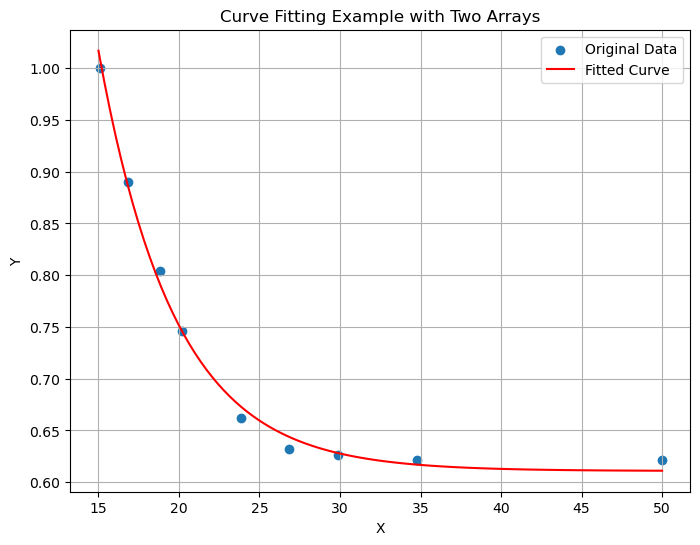

9.787026460005688 0.21214059279219613 0.610802908689377


In [3]:
# Ajuste dados Furnas
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fcn(x, a, b, c):
    return a * np.exp(-x * b) + c
    
x = [15.124, 16.857, 18.800, 20.191, 23.841, 26.834, 29.880, 34.790, 50.000] 
y = [1.00, 0.890, 0.804, 0.746, 0.662, 0.632, 0.626, 0.621, 0.621]
fit_params, _ = curve_fit(fcn, x, y, bounds=([0, 0.1, 0], [100, 2, 10]))
a_fit, b_fit, c_fit = fit_params
x_data = np.linspace(15, 50, 100)
y_fit = fcn(x_data, a_fit, b_fit, c_fit)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x_data, y_fit, color='red', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curve Fitting Example with Two Arrays')
plt.legend()
plt.grid(True)
plt.show()
print(a_fit, b_fit, c_fit)

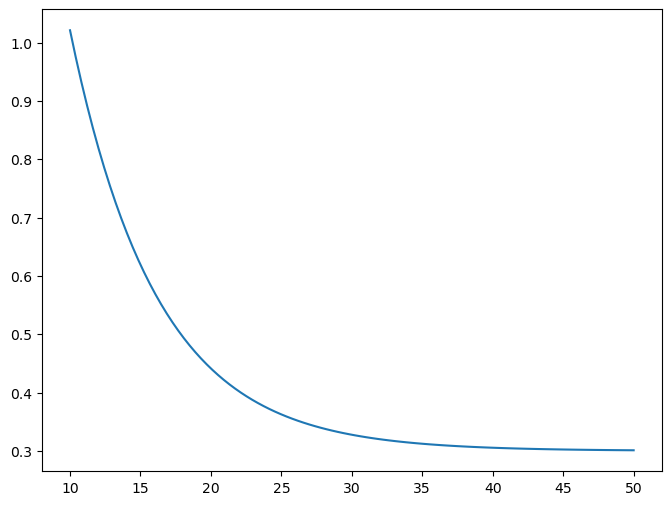

In [7]:
v = np.linspace(10, 50, 100)
y = 3.68 * np.exp(-0.163*v) + 0.3
plt.figure(figsize=(8, 6))
plt.plot(v, y)
